In [ ]:
# !pip install pandas
# !pip install seaborn
# !pip install torch==2.2.0 torchvision==0.17.0 torchaudio==2.2.0 --index-url https://download.pytorch.org/whl/rocm5.6
# !pip install torch_geometric
# !pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
# !pip install Cython
# !pip install sympy
# !pip install imblearn
# !pip install tqdm
# !pip install pandas networkx matplotlib
import pandas as pd

In [ ]:
df = pd.read_csv('onlinefraud.csv')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [ ]:
df['amount_to_oldbalanceOrg_ratio'] = df['amount'] / df['oldbalanceOrg']
df['amount_to_oldbalanceDest_ratio'] = df['amount'] / (df['oldbalanceDest'] + 0.1)  # Adding 0.1 to avoid division by zero
df['newbalanceOrig_to_oldbalanceOrg_ratio'] = df['newbalanceOrig'] / (df['oldbalanceOrg'] + 0.1)
df['newbalanceDest_to_oldbalanceDest_ratio'] = df['newbalanceDest'] / (df['oldbalanceDest'] + 0.1)

In [ ]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_to_oldbalanceOrg_ratio,amount_to_oldbalanceDest_ratio,newbalanceOrig_to_oldbalanceOrg_ratio,newbalanceDest_to_oldbalanceDest_ratio
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,1.000000,49538930.8,1.0,0.0
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,1.000000,13430020.8,1.0,0.0
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,1.000000,5366244.1,1.0,0.0
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,1.000000,48921930.9,1.0,0.0
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,0.510594,100000000.0,1.0,0.0
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1,0.489406,95850403.7,1.0,0.0
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,1.000000,35762971.0,1.0,0.0
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,1.000000,3538742.2,1.0,0.0
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1,1.000000,25426642.7,1.0,0.0
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1,0.961627,100000000.0,1.0,0.0


In [ ]:
Fraud=df[df['isFraud']==1]
Fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_to_oldbalanceOrg_ratio,amount_to_oldbalanceDest_ratio,newbalanceOrig_to_oldbalanceOrg_ratio,newbalanceDest_to_oldbalanceDest_ratio
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,1.0,1.810000e+03,0.0,0.000000e+00
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,1.0,8.544951e-03,0.0,0.000000e+00
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,1.0,2.806000e+04,0.0,0.000000e+00
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,1.0,1.070907e-01,0.0,0.000000e+00
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,1.0,2.012800e+05,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,1.0,3.396821e+06,0.0,3.396821e+06
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,1.0,6.311409e+07,0.0,0.000000e+00
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,1.0,9.215224e+01,0.0,9.315224e+01
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,1.0,8.500025e+06,0.0,0.000000e+00


In [ ]:
import numpy as np

In [ ]:
df['transaction_direction'] = np.where(df['amount'] > 0, 'Outgoing', 'Incoming')

In [ ]:
bins = [0, 1000, 5000, 10000, 50000, np.inf]
labels = ['very_low', 'low', 'medium', 'high', 'very_high']
df['amount_bin'] = pd.cut(df['amount'], bins=bins, labels=labels, right=False)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_to_oldbalanceOrg_ratio,amount_to_oldbalanceDest_ratio,newbalanceOrig_to_oldbalanceOrg_ratio,newbalanceDest_to_oldbalanceDest_ratio,transaction_direction,amount_bin
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.057834,9.839640e+04,0.942165,0.000000e+00,Outgoing,medium
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.087735,1.864280e+04,0.912261,0.000000e+00,Outgoing,low
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1.000000,1.810000e+03,0.000000,0.000000e+00,Outgoing,very_low
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1.000000,8.544951e-03,0.000000,0.000000e+00,Outgoing,very_low
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.280795,1.166814e+05,0.719204,0.000000e+00,Outgoing,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1.000000,3.396821e+06,0.000000,3.396821e+06,Outgoing,very_high
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1.000000,6.311409e+07,0.000000,0.000000e+00,Outgoing,very_high
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1.000000,9.215224e+01,0.000000,9.315224e+01,Outgoing,very_high
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1.000000,8.500025e+06,0.000000,0.000000e+00,Outgoing,very_high


In [ ]:
df['nameOrig'].value_counts().head(50)

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
C1832548028    3
C1976208114    3
C2051359467    3
C1065307291    3
C1530544995    3
C17383104      2
C395795711     2
C1388763820    2
C1016934729    2
C1518561015    2
C1658461807    2
C709041245     2
C659608134     2
C1523592241    2
C2120304028    2
C1243795678    2
C142721306     2
C531630658     2
C1587125738    2
C2023074729    2
C1248315344    2
C142881435     2
C1159854452    2
C1628357145    2
C1026254665    2
C1716748090    2
C1879958008    2
C511264308     2
C539004364     2
C642414537     2
C998023735     2
C1032392212    2
C1644305871    2
C904625737     2
C161832559     2
C84922634      2
C876322114     2
C1200055473    2
C437815060     2
C1962457725    2
Name: count, dtype: int64

In [ ]:
df['nameDest'].value_counts().head(50)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
C977993101      96
C97730845       96
C392292416      95
C1899073220     92
C306206744      91
C1234776885     90
C1782113663     90
C998351292      89
C716083600      89
C909295153      88
C667346055      86
C1674899618     86
C1262822392     85
C1816757085     84
C1255024717     84
C453211571      84
C2006081398     83
C932583850      82
C1504109395     82
C991363637      82
C1303868418     81
C728526866      81
C214774813      80
C33524623       80
C1883840933     80
C1870252780     80
C766681183      80
C1721246982     80
C11003494       80
C1909597726     80
C662736689      79
C1167066016     79
C769342184      78
C423580937      77
C803116137      77
C1297685781     76
C1850180796     76
C1730752455     76
C863811613      75
C2049813033     75
Name: count, dtype: int64

In [ ]:
columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
           'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

for column in columns:
    unique_values = df[column].nunique()
    percentage = (unique_values / len(df)) * 100
    print(f"Number of unique values in {column}: {unique_values}, percentage: {percentage:.2f}%")


Number of unique values in step: 743, percentage: 0.01%
Number of unique values in type: 5, percentage: 0.00%
Number of unique values in amount: 5316900, percentage: 83.56%
Number of unique values in nameOrig: 6353307, percentage: 99.85%
Number of unique values in oldbalanceOrg: 1845844, percentage: 29.01%
Number of unique values in newbalanceOrig: 2682586, percentage: 42.16%
Number of unique values in nameDest: 2722362, percentage: 42.79%
Number of unique values in oldbalanceDest: 3614697, percentage: 56.81%
Number of unique values in newbalanceDest: 3555499, percentage: 55.88%
Number of unique values in isFraud: 2, percentage: 0.00%
Number of unique values in isFlaggedFraud: 2, percentage: 0.00%


In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df.describe()

/root/miniconda3/envs/sadtalker/lib/python3.8/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_to_oldbalanceOrg_ratio,amount_to_oldbalanceDest_ratio,newbalanceOrig_to_oldbalanceOrg_ratio,newbalanceDest_to_oldbalanceDest_ratio
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362604e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,inf,2.788067e+05,3.722965e+03,1.960373e+05
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,NaN,1.879307e+06,9.972634e+04,2.647829e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.765481e-08,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.344197e-01,1.607058e-01,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,6.458605e+00,9.179406e-01,0.000000e+00,9.185623e-01
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,NaN,9.729670e+04,9.765240e-01,1.239797e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,inf,6.096528e+08,8.131608e+06,6.630842e+08


In [ ]:
df.isnull().sum()

step                                       0
type                                       0
amount                                     0
nameOrig                                   0
oldbalanceOrg                              0
newbalanceOrig                             0
nameDest                                   0
oldbalanceDest                             0
newbalanceDest                             0
isFraud                                    0
isFlaggedFraud                             0
amount_to_oldbalanceOrg_ratio             16
amount_to_oldbalanceDest_ratio             0
newbalanceOrig_to_oldbalanceOrg_ratio      0
newbalanceDest_to_oldbalanceDest_ratio     0
transaction_direction                      0
amount_bin                                 0
dtype: int64

In [ ]:
df['amount_to_oldbalanceOrg_ratio'].fillna(df['amount_to_oldbalanceOrg_ratio'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

step                                      0
type                                      0
amount                                    0
nameOrig                                  0
oldbalanceOrg                             0
newbalanceOrig                            0
nameDest                                  0
oldbalanceDest                            0
newbalanceDest                            0
isFraud                                   0
isFlaggedFraud                            0
amount_to_oldbalanceOrg_ratio             0
amount_to_oldbalanceDest_ratio            0
newbalanceOrig_to_oldbalanceOrg_ratio     0
newbalanceDest_to_oldbalanceDest_ratio    0
transaction_direction                     0
amount_bin                                0
dtype: int64

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_to_oldbalanceOrg_ratio,amount_to_oldbalanceDest_ratio,newbalanceOrig_to_oldbalanceOrg_ratio,newbalanceDest_to_oldbalanceDest_ratio,transaction_direction,amount_bin
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.057834,9.839640e+04,0.942165,0.000000e+00,Outgoing,medium
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.087735,1.864280e+04,0.912261,0.000000e+00,Outgoing,low
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1.000000,1.810000e+03,0.000000,0.000000e+00,Outgoing,very_low
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1.000000,8.544951e-03,0.000000,0.000000e+00,Outgoing,very_low
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.280795,1.166814e+05,0.719204,0.000000e+00,Outgoing,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1.000000,3.396821e+06,0.000000,3.396821e+06,Outgoing,very_high
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1.000000,6.311409e+07,0.000000,0.000000e+00,Outgoing,very_high
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1.000000,9.215224e+01,0.000000,9.315224e+01,Outgoing,very_high
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1.000000,8.500025e+06,0.000000,0.000000e+00,Outgoing,very_high


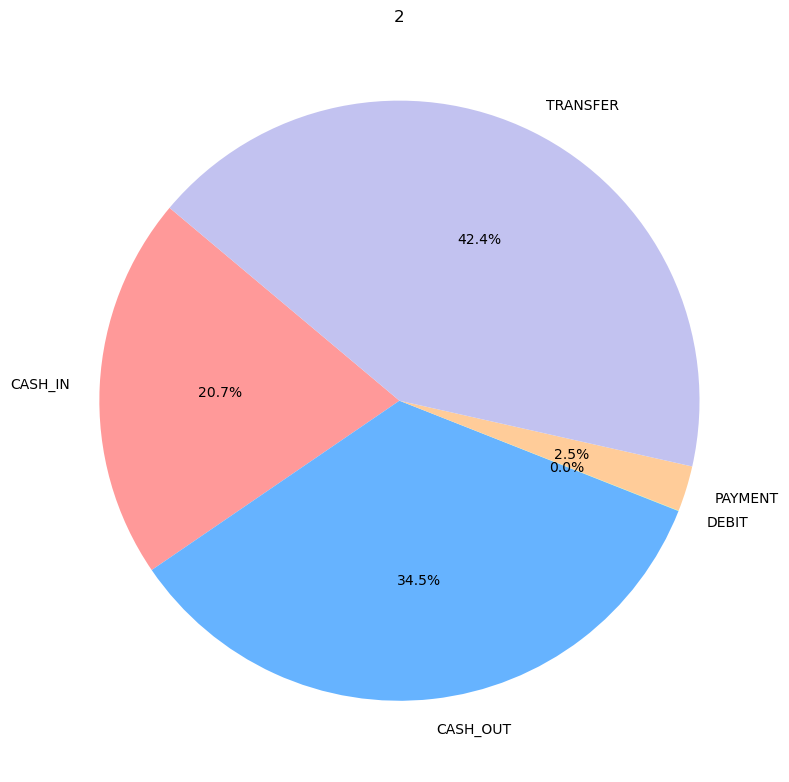

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

grouped_df = df.groupby('type')['amount'].sum()
plt.figure(figsize=(8, 8))
plt.pie(grouped_df, labels=grouped_df.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('2')
plt.axis('equal')
plt.tight_layout()
plt.show()


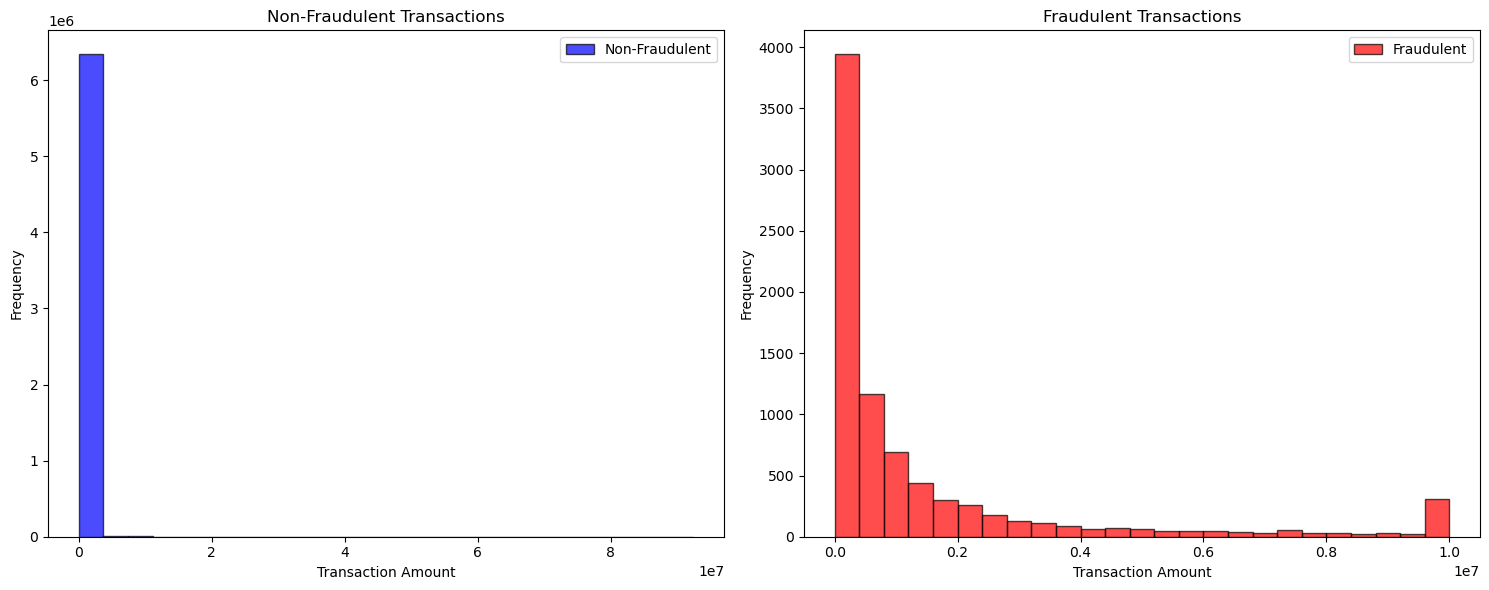

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Separate fraudulent and non-fraudulent transactions
fraudulent_transactions = df[df['isFraud'] == 1]['amount']
non_fraudulent_transactions = df[df['isFraud'] == 0]['amount']

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].hist(non_fraudulent_transactions, bins=25, alpha=0.7, color='blue', label='Non-Fraudulent', edgecolor='black')
axs[0].set_title('Non-Fraudulent Transactions')
axs[0].set_xlabel('Transaction Amount')
axs[0].set_ylabel('Frequency')
axs[0].legend()

axs[1].hist(fraudulent_transactions, bins=25, alpha=0.7, color='red', label='Fraudulent', edgecolor='black')
axs[1].set_title('Fraudulent Transactions')
axs[1].set_xlabel('Transaction Amount')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()

plt.show()


In [ ]:
fraudulent_transactions.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
non_fraudulent_transactions.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

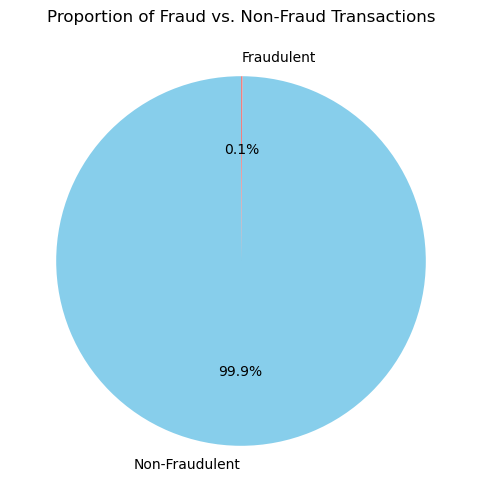

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fraud_counts = df['isFraud'].value_counts()

labels = ['Non-Fraudulent', 'Fraudulent']

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)

plt.title('Proportion of Fraud vs. Non-Fraud Transactions')

plt.show()


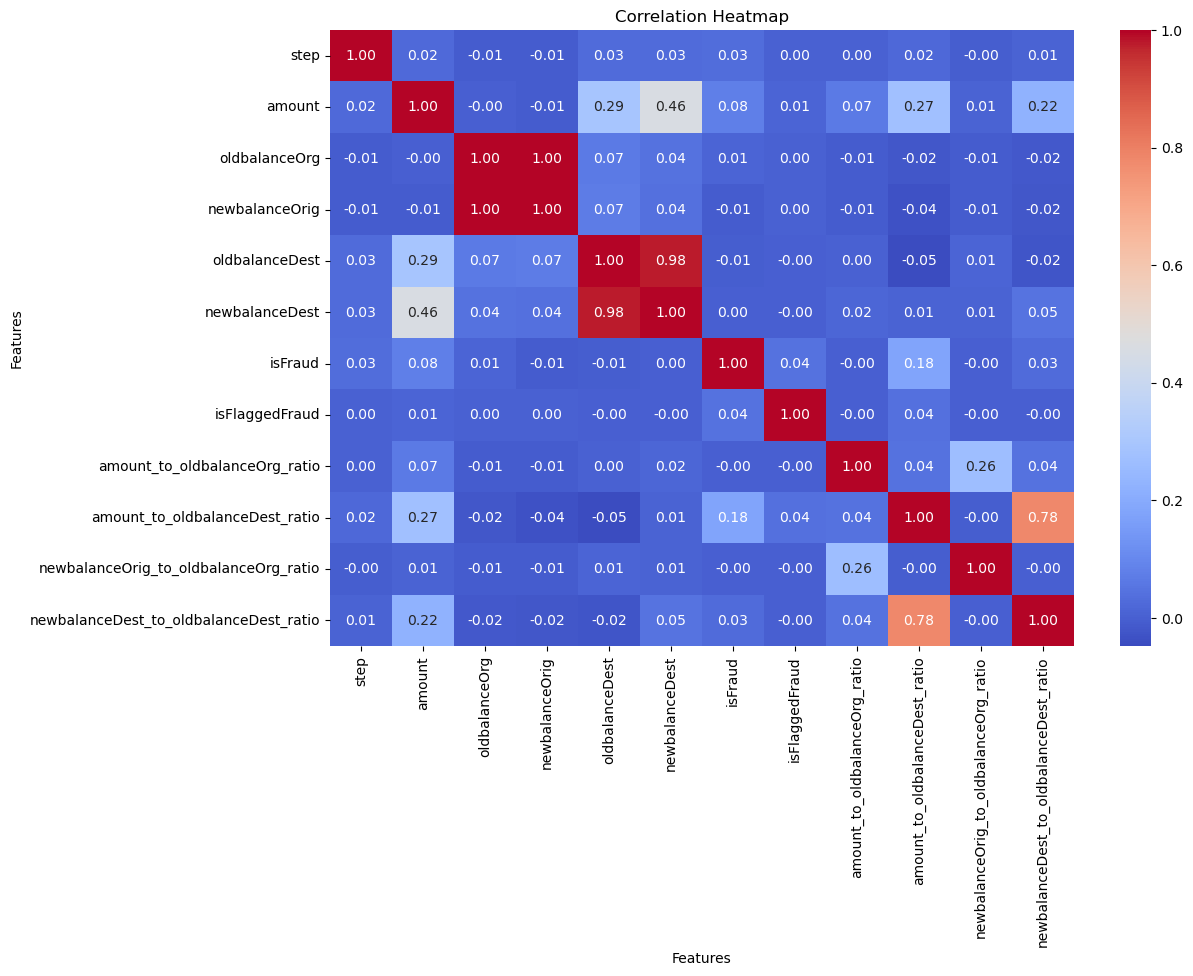

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numerical_features = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming DataFrame is named df
# plt.figure(figsize=(10, 6))
# plt.scatter(x=df['oldbalanceOrg'], y=df['amount'], c=df['isFraud'], cmap='Set1', alpha=0.7)
# plt.title('Transaction Amount vs. Old Balance (Colored by Fraud Status)')
# plt.xlabel('Old Balance')
# plt.ylabel('Transaction Amount')
# plt.colorbar(label='Fraud')
# plt.show()


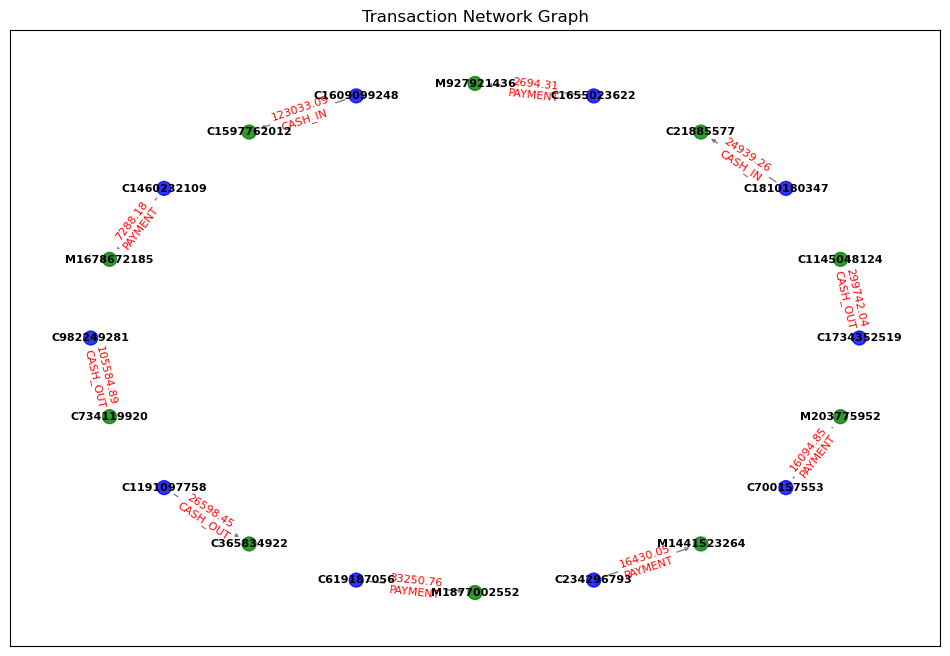

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

subset_df = df.sample(n=10)

G = nx.DiGraph()

for _, row in subset_df.iterrows():
    for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
        G.add_node(row['nameOrig'], attr=row[col], color='blue', node_type='nameOrig', label=row['nameOrig'])
        G.add_node(row['nameDest'], attr=row[col], color='green', node_type='nameDest', label=row['nameDest'])
    G.add_edge(row['nameOrig'], row['nameDest'], amount=row['amount'], type=row['type'])

plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)

node_colors = [G.nodes[node]['color'] for node in G.nodes]
node_types = [G.nodes[node]['node_type'] for node in G.nodes]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100, alpha=0.8)

nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=5)
edge_labels = {(edge[0], edge[1]): f"{G.edges[edge]['amount']}\n{G.edges[edge]['type']}" for edge in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

labels = {node: G.nodes[node]['label'] for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='black', font_weight='bold')

plt.title('Transaction Network Graph')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])
df['transaction_direction'] = le.fit_transform(df['transaction_direction'])
df['amount_bin'] = le.fit_transform(df['amount_bin'])

In [ ]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tqdm import tqdm
import pandas as pd

node_features = torch.tensor(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].values, dtype=torch.float32)

df['node_identifier'] = range(len(df))

id_mapping = {id_: idx for idx, id_ in enumerate(df['node_identifier'].unique())}
df['nameOrig'] = df['node_identifier'].map(id_mapping)
df['nameDest'] = df['node_identifier'].map(id_mapping)

edges = torch.tensor(df[['nameOrig', 'nameDest']].values, dtype=torch.long).t().contiguous()
data = Data(x=node_features, edge_index=edges)
print(data)
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

gnn_model = GNNModel(input_dim=node_features.size(1), hidden_dim=64, output_dim=32)

optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in tqdm(range(150), desc='Training GNN'):
    optimizer.zero_grad()
    out = gnn_model(data)
    target = torch.tensor(df['isFraud'].values, dtype=torch.long)
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()

with torch.no_grad():
    gnn_model.eval()
    node_embeddings = gnn_model.conv1(data.x, data.edge_index).detach().numpy()

iso_forest = IsolationForest()
iso_forest.fit(node_embeddings)

anomaly_scores = iso_forest.decision_function(node_embeddings)
df['anomaly_score'] = anomaly_scores

threshold = -0.2
df['is_potentially_fraudulent'] = (df['anomaly_score'] < threshold).astype(int)

print(df[df['is_potentially_fraudulent'] == 1])

Data(x=[6362620, 5], edge_index=[2, 6362620])


Training GNN: 100%|██████████████████████████████████████████| 150/150 [21:07<00:00,  8.45s/it]


         step      type       amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
113         1  CASH_OUT     85423.63       113           0.00            0.00   
156         1  CASH_OUT    186447.51       156           0.00            0.00   
171         1  CASH_OUT     44443.08       171           0.00            0.00   
177         1  CASH_OUT    220691.42       177           0.00            0.00   
289         1  CASH_OUT    691738.36       289           0.00            0.00   
...       ...       ...          ...       ...            ...             ...   
6362507   734  CASH_OUT  10000000.00   6362507    10000000.00            0.00   
6362576   741  TRANSFER  10000000.00   6362576    45674547.89     35674547.89   
6362578   741  TRANSFER  10000000.00   6362578    35674547.89     25674547.89   
6362580   741  TRANSFER  10000000.00   6362580    25674547.89     15674547.89   
6362583   741  CASH_OUT  10000000.00   6362583    10000000.00            0.00   

         nameDest  oldbalan

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

predicted_labels = (df['anomaly_score'] < threshold).astype(int)

true_labels = df['isFraud']

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, df['anomaly_score'])
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9803
Precision: 0.0016
Recall: 0.0223
F1 Score: 0.0029
Confusion Matrix:
[[6237403  117004]
 [   8030     183]]


In [ ]:
torch.save(gnn_model.state_dict(), "t-fraud.pth")

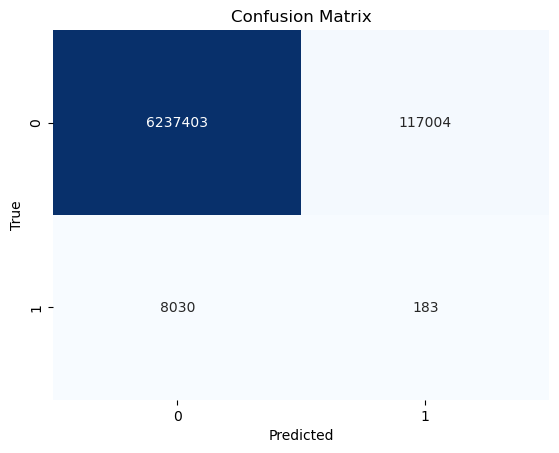

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   6354407
           1       0.00      0.02      0.00      8213

    accuracy                           0.98   6362620
   macro avg       0.50      0.50      0.50   6362620
weighted avg       1.00      0.98      0.99   6362620



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(df['isFraud'].values, df['is_potentially_fraudulent'].values)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(df['isFraud'].values, df['is_potentially_fraudulent'].values))


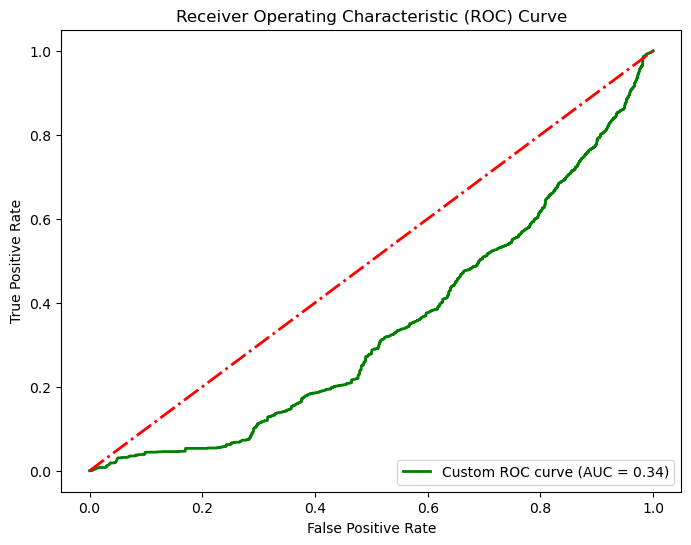

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(df['isFraud'].values, df['anomaly_score'].values)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='Custom ROC curve (AUC = {:.2f})'.format(roc_auc))  # Modified label and color
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='-.')  # Changed linestyle and color of the diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Modified title
plt.legend(loc='lower right')
plt.show()


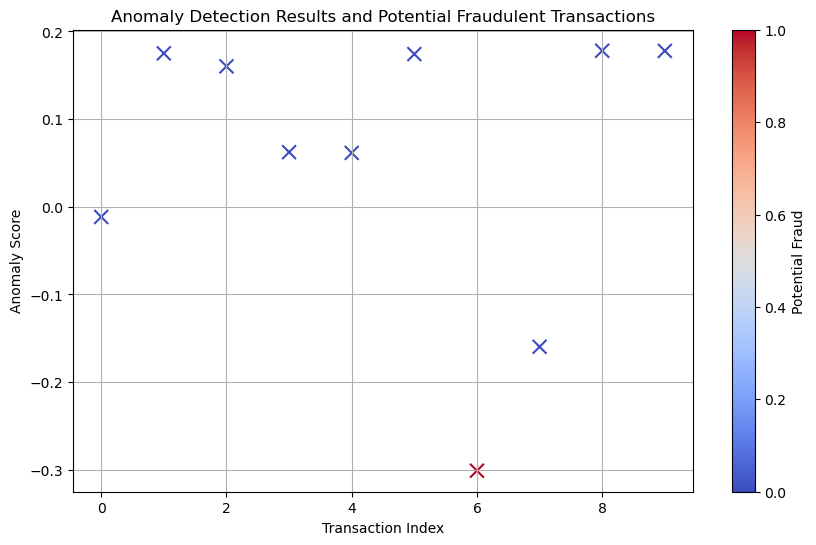

In [ ]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
import random

gnn_model = GNNModel(input_dim=5, hidden_dim=64, output_dim=32)
gnn_model.load_state_dict(torch.load("t-fraud.pth"))

selected_indices = random.sample(range(len(df)), 10)
selected_data = df.iloc[selected_indices][['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

id_mapping = {id_: idx for idx, id_ in enumerate(selected_data.index)}
selected_data['nameOrig'] = selected_data.index.map(id_mapping)
selected_data['nameDest'] = selected_data.index.map(id_mapping)

node_features = torch.tensor(selected_data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].values, dtype=torch.float32)
edges = torch.tensor(selected_data[['nameOrig', 'nameDest']].values, dtype=torch.long).t().contiguous()
selected_data = Data(x=node_features, edge_index=edges)

gnn_model.eval()

with torch.no_grad():
    node_embeddings = gnn_model.conv1(selected_data.x, selected_data.edge_index).numpy()

iso_forest = IsolationForest()
iso_forest.fit(node_embeddings)

anomaly_scores = iso_forest.decision_function(node_embeddings)
selected_data['anomaly_score'] = anomaly_scores

threshold = -0.2
selected_data['is_potentially_fraudulent'] = (selected_data['anomaly_score'] < threshold).astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(range(10), selected_data['anomaly_score'], c=selected_data['is_potentially_fraudulent'], cmap='coolwarm', s=100, marker='x')
plt.xlabel('Transaction Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection Results and Potential Fraudulent Transactions')
plt.colorbar(label='Potential Fraud')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

anomaly_scores = df['anomaly_score'].values
threshold_range = np.arange(-0.5, 0.5, 0.05)

best_threshold = None
best_f1_score = 0.0

for threshold in threshold_range:
    predictions = np.where(anomaly_scores < threshold, 1, 0)
    current_f1_score = f1_score(df['isFraud'].values, predictions)

    if current_f1_score > best_f1_score:
        best_f1_score = current_f1_score
        best_threshold = threshold

print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score: {best_f1_score}')

Best Threshold: -0.10000000000000009
Best F1 Score: 0.006688704018885753


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

anomaly_scores = np.array(df['anomaly_score'])

optimized_threshold = -0.10000000000000009
is_potentially_fraudulent = np.where(anomaly_scores < optimized_threshold, 1, 0)

y_true = np.array(df['isFraud'])
y_pred = is_potentially_fraudulent

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Optimized Threshold: {optimized_threshold}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:')
print(cm)

classification_rep = classification_report(y_true, y_pred)
print('\nClassification Report:')
print(classification_rep)

roc_auc = roc_auc_score(y_true, anomaly_scores)
print(f'\nROC-AUC Score: {roc_auc:.4f}')

Optimized Threshold: -0.10000000000000009
Precision: 0.0034
Recall: 0.1366
F1 Score: 0.0067

Confusion Matrix:
[[6028251  326156]
 [   7091    1122]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   6354407
           1       0.00      0.14      0.01      8213

    accuracy                           0.95   6362620
   macro avg       0.50      0.54      0.49   6362620
weighted avg       1.00      0.95      0.97   6362620


ROC-AUC Score: 0.3423


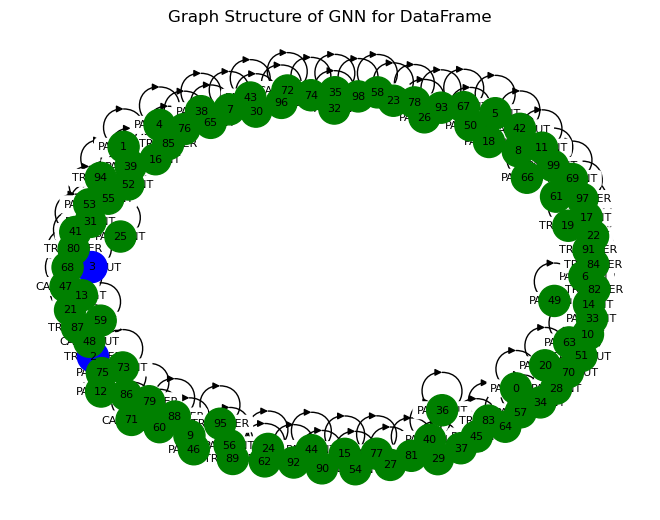

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df_sample = df.head(100)

G = nx.DiGraph()

for index, row in df_sample.iterrows():
    G.add_node(row['nameOrig'], label=row['nameOrig'], type='user', amount=row['amount'], isFraud=row['isFraud'])
    G.add_node(row['nameDest'], label=row['nameDest'], type='destination', isFraud=row['isFraud'])
    G.add_edge(row['nameOrig'], row['nameDest'], transaction_type=row['type'], amount=row['amount'])

node_colors = ['blue' if G.nodes[node]['isFraud'] == 1 else 'green' for node in G.nodes]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, font_color='black', font_size=8, node_size=500)
edge_labels = nx.get_edge_attributes(G, 'transaction_type')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

plt.title('Graph Structure of GNN for DataFrame')
plt.show()
